In [1]:
import os, sys

In [2]:
import numpy as np

In [3]:
import time

In [11]:
from datetime import datetime

In [8]:
filelist = [fname for fname in sorted(os.listdir(folder)) if fname.endswith('logfile.txt')]

In [9]:
def get_max_evt_number(folder, fname):
    with open(os.path.join(folder, fname)) as f:
        event_numbers = []
        firstline = f.readline()
        date = datetime.strptime(firstline, '%d/%m/%Y\t%H:%M\n')
        #print(firstline, date)    
        for line in f.readlines()[1:]:
            event_numbers.append(int(line.split('\t')[-1].split('\n')[0]))
    return date, np.max(event_numbers)

In [19]:
rates = {}
for (i, ts), (j, tsp1) in zip(enumerate(filelist), enumerate(filelist[1:])):
    # delta = (timestamps[tsp1]-timestamps[ts]).seconds
    filetime1, events1 = get_max_evt_number(folder, ts)
    filetime2, events2 = get_max_evt_number(folder, tsp1)
    delta_ft = filetime2 - filetime1
    if delta_ft.seconds > 0 and delta_ft.seconds < 3600:
        print(filetime)
        rates[ts] = (filetime1, events1 / delta_ft.seconds)
        # print(filetime1, filetime2, ts, tsp1, delta_ft.seconds, np.ceil(events1/delta_ft.seconds))

print(np.asarray(list(rates.values()))[:,1], np.mean(np.asarray(list(rates.values()))[:,1]))


Tue Aug  3 09:38:00 2021
Tue Aug  3 09:38:00 2021
Tue Aug  3 09:38:00 2021
Tue Aug  3 09:38:00 2021
Tue Aug  3 09:38:00 2021
Tue Aug  3 09:38:00 2021
Tue Aug  3 09:38:00 2021
Tue Aug  3 09:38:00 2021
Tue Aug  3 09:38:00 2021
Tue Aug  3 09:38:00 2021
Tue Aug  3 09:38:00 2021
Tue Aug  3 09:38:00 2021
Tue Aug  3 09:38:00 2021
Tue Aug  3 09:38:00 2021
[1.8196969696969696 3.3361111111111112 4.003333333333333 4.006666666666667
 3.3361111111111112 6.677777777777778 4.006666666666667 3.3361111111111112
 4.023333333333333 3.3361111111111112 4.003333333333333 5.004166666666666
 4.003333333333333 6.688888888888889] 4.112974386724386


In [57]:
rates = {}
for (i, ts), (j, tsp1) in zip(enumerate(filelist), enumerate(filelist[1:])):
    # delta = (timestamps[tsp1]-timestamps[ts]).seconds
    filetime1, events1 = get_max_evt_number(folder, ts)
    filetime2, events2 = get_max_evt_number(folder, tsp1)
    delta_ft = filetime2 - filetime1
    if delta_ft.seconds > 0 and delta_ft.seconds < 3600:
        rates[ts] = (filetime1.strftime("%Y-%m-%d %H:%M"), events1 / delta_ft.seconds)
        
rates_arr = np.asarray([rate for _,rate in list(rates.values())])
print(rates_arr, np.mean(rates_arr))

[1.81969697 3.33611111 4.00333333 4.00666667 3.33611111 6.67777778
 4.00666667 3.33611111 4.02333333 3.33611111 4.00333333 5.00416667
 4.00333333 6.68888889] 4.112974386724386


In [53]:
[rate for _,rate in list(rates.values())]

[1.8196969696969696,
 3.3361111111111112,
 4.003333333333333,
 4.006666666666667,
 3.3361111111111112,
 6.677777777777778,
 4.006666666666667,
 3.3361111111111112,
 4.023333333333333,
 3.3361111111111112,
 4.003333333333333,
 5.004166666666666,
 4.003333333333333,
 6.688888888888889]

In [25]:
rates.values()

dict_values([1.8196969696969696, 3.3361111111111112, 4.003333333333333, 4.006666666666667, 3.3361111111111112, 6.677777777777778, 4.006666666666667, 3.3361111111111112, 4.023333333333333, 3.3361111111111112, 4.003333333333333, 5.004166666666666, 4.003333333333333, 6.688888888888889])

In [16]:
np.asarray(list(rates.values()))[:,1]

array([1.8196969696969696, 3.3361111111111112, 4.003333333333333,
       4.006666666666667, 3.3361111111111112, 6.677777777777778,
       4.006666666666667, 3.3361111111111112, 4.023333333333333,
       3.3361111111111112, 4.003333333333333, 5.004166666666666,
       4.003333333333333, 6.688888888888889], dtype=object)

In [157]:
rates.values()

dict_values([1.8196969696969696, 3.3361111111111112, 4.003333333333333, 4.006666666666667, 3.3361111111111112, 6.677777777777778, 4.006666666666667, 3.3361111111111112, 4.023333333333333, 3.3361111111111112, 4.003333333333333, 5.004166666666666, 4.003333333333333, 6.688888888888889])

In [58]:
import json

In [59]:
import matplotlib.pyplot as plt

In [138]:
def read_triggerrate_dict_and_plot(tr_rate_dict, lw=.2, ylim=(0,70)):
    rates = json.load(open(tr_rate_dict))
    findex =  [i for i, (fname, rate) in enumerate(rates.items())]
    data_rates = [rate for i, (fname, rate) in enumerate(rates.items())]

    dates= [d for d, r in data_rates]
    tr_rate = [r for d, r in data_rates]
    plt.figure(figsize=(12,6))
    plt.plot(findex, tr_rate, linewidth=lw)
    plt.ylabel('trigger rate (Hz)', fontsize='x-large')
    plt.xlabel('run_number', fontsize='x-large')
    plt.ylim(ylim)
    plt.xticks(findex[::int(len(findex)/6)],dates[::int(len(findex)/6)], rotation=30, fontsize='medium')
    plt.show()
    
    
    return

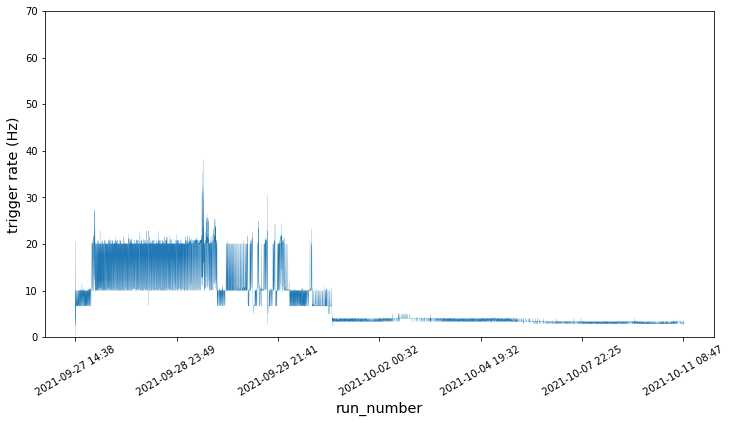

In [139]:
read_triggerrate_dict_and_plot('trigger_rate_202109_start_0927_new_tboard', lw=.2, ylim=(0,70))

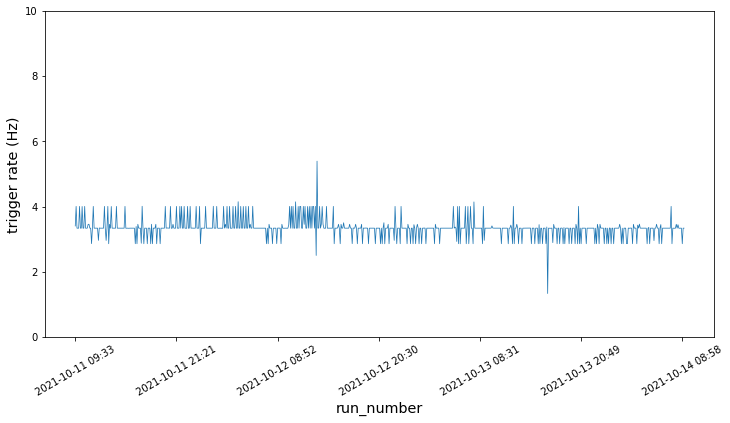

In [144]:
read_triggerrate_dict_and_plot('trigger_rate_202110_start_1011', lw=.75, ylim=(0,10))

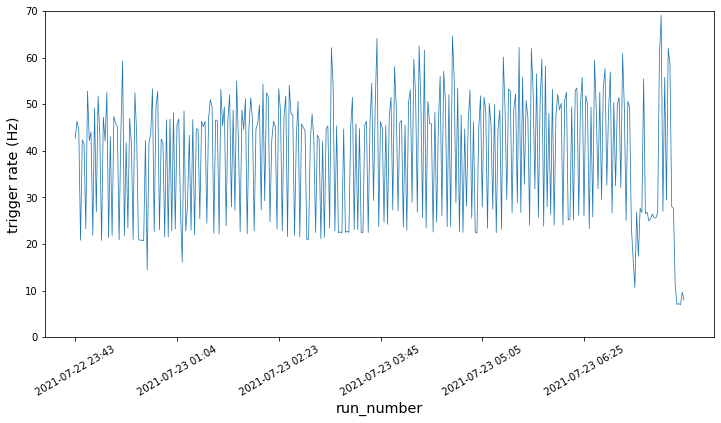

In [141]:
read_triggerrate_dict_and_plot('trigger_rate_202107_start_0722_top_hisp_onlyY', lw=.75)

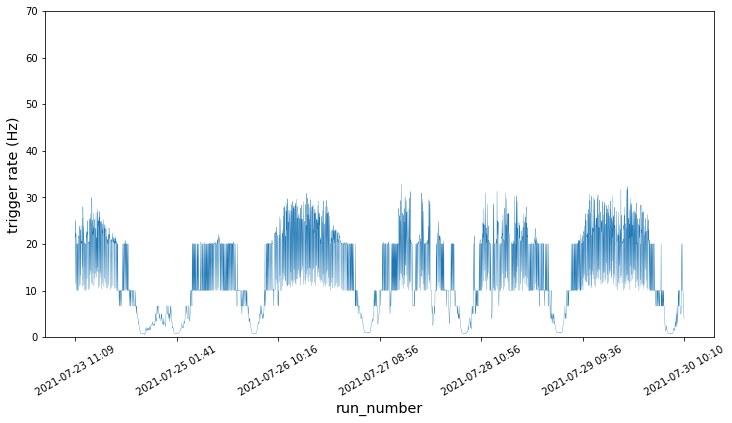

In [142]:
read_triggerrate_dict_and_plot('trigger_rate_202107_start_0723', lw=.3)

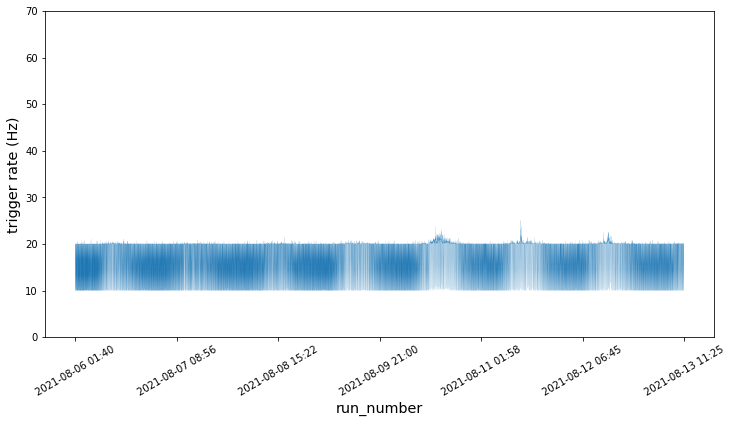

In [143]:
read_triggerrate_dict_and_plot('trigger_rate_202108_start_0806', lw=.1)